# CS4248 Project Group 23

In [1]:
import pandas as pd
from sklearn.metrics import f1_score
import numpy as np
import tensorflow as tf

/home/t1dus/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2024-04-18 22:42:49.353539: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-18 22:42:49.456816: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-18 22:42:49.859908: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-18 22:42:51.301305: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
train = pd.read_csv("raw_data/fulltrain.csv")
x_train = train.iloc[:, 1].values 
y_train = train.iloc[:, 0].values == 4 # true => trusted

#val-train split
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [3]:
# References

# https://www.tensorflow.org/text/tutorials/text_classification_rnn
# https://medium.com/analytics-vidhya/understanding-embedding-layer-in-keras-bbe3ff1327ce

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TextVectorization, Embedding, LSTM, Dense, Bidirectional

VOCAB_SIZE = 5000
EMBEDDING_DIM = 100
MAX_SEQUENCE_LENGTH = 200
encoder = tf.keras.layers.TextVectorization(
    output_sequence_length=MAX_SEQUENCE_LENGTH,
    max_tokens=VOCAB_SIZE)
encoder.adapt(x_train)

model = Sequential([
    encoder,
    Embedding(VOCAB_SIZE, EMBEDDING_DIM, mask_zero=True),
    Bidirectional(LSTM(64)),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

2024-04-18 22:42:55.818223: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 334857264 exceeds 10% of free system memory.
2024-04-18 22:42:55.818286: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 502285896 exceeds 10% of free system memory.
2024-04-18 22:42:56.291526: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 167428632 exceeds 10% of free system memory.
2024-04-18 22:42:56.469905: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 83714316 exceeds 10% of free system memory.
2024-04-18 22:42:56.600615: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 167428632 exceeds 10% of free system memory.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ ?                      │   0 (unbuilt) │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [6]:
history = model.fit(x_train, y_train, batch_size = 32, epochs = 3, validation_data=(x_val, y_val))

Epoch 1/3
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 178s 143ms/step - acc: 0.8931 - loss: 0.2693 - val_acc: 0.9511 - val_loss: 0.1317
Epoch 2/3
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 176s 144ms/step - acc: 0.9722 - loss: 0.0743 - val_acc: 0.9626 - val_loss: 0.1044
Epoch 3/3
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 155s 127ms/step - acc: 0.9887 - loss: 0.0337 - val_acc: 0.9554 - val_loss: 0.1375


dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])


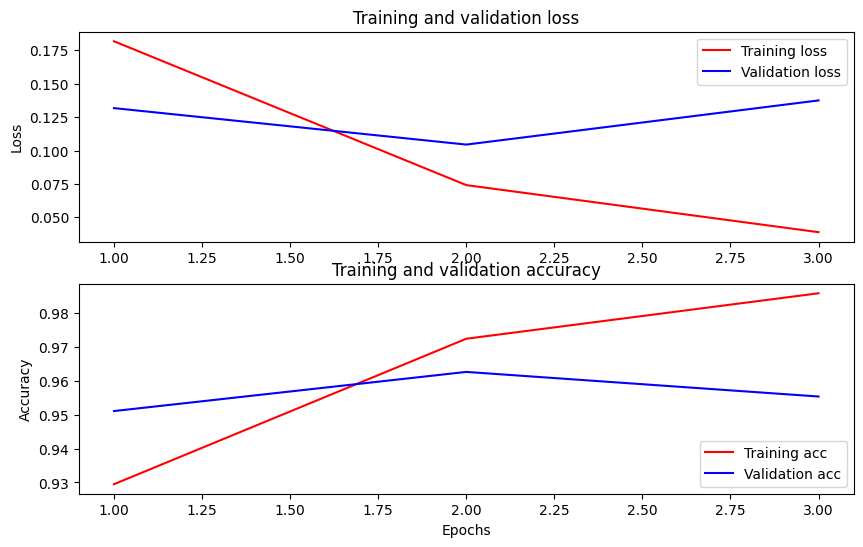

In [7]:
import matplotlib.pyplot as plt
history_dict = history.history
print(history_dict.keys())

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [8]:
# get the training error

# print for the train set f1 score is
print("Train Set: " + str(f1_score(y_train, np.round(model.predict(x_train)), average='macro')))
# print for the validation set f1 score is
print("Validation Set: " + str(f1_score(y_val, np.round(model.predict(x_val)), average='macro')))

1222/1222 ━━━━━━━━━━━━━━━━━━━━ 49s 40ms/step
Train Set: 0.9912097531659464
306/306 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step
Validation Set: 0.9291502182559033


In [9]:
# get the prediction for the test set
test = pd.read_csv('raw_data/balancedtest.csv')

x_test = test.iloc[:, 1].values 
y_test = test.iloc[:, 0].values == 4

y_pred = np.round(model.predict(x_test))

# get the f1 score
f1_score_test = f1_score(y_test, y_pred, average='macro')
print(f1_score_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step
0.8296350352204995


In [10]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from afinn import Afinn
import nltk
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
from nltk.tag import pos_tag

test = pd.read_excel("./raw_data/test.xlsx").rename({'Satirical =1 Legitimate=0': 'Verdict', 'Full Text ': 'Text'}, axis=1) #raw dataframe
y_actual = test['Verdict']
y_pred_test = 1-np.round(model.predict(test['Text'].values))  # add your model's results when predicting on test.xlsx
y_pred_test = pd.Series(y_pred_test.flatten())

def get_superlatives(text):
    superlatives = []
    # Tokenize text into words
    words = word_tokenize(text)
    # Tag words with part-of-speech (POS)
    tagged_words = pos_tag(words)
    # Filter words tagged as superlatives
    for word, pos in tagged_words:
        if pos == 'JJS' or word.endswith('est') or word.startswith('most'):
            superlatives.append(word)
    return superlatives

print("Test F1 score is:", f1_score(y_actual, y_pred_test))
print("Accuracy:", accuracy_score(y_actual, y_pred_test))
print("Precision:", precision_score(y_actual, y_pred_test))
print("Confusion Matrix:")
print(confusion_matrix(y_actual, y_pred_test))

# Per y output type
# print ('Per y label-----')
# for i in range(1, 5):
#     y_cat_actual = y_actual_4outputs[y_actual_4outputs == i].apply(lambda x: 1 if x == 4 else 0) 
#     y_cat_pred = y_pred_test[y_actual_4outputs == i]
#     print("Accuracy:", accuracy_score(y_cat_actual, y_cat_pred))
#     print("Precision:", precision_score(y_cat_actual, y_cat_pred))
#     print("Confusion Matrix:")
#     print(confusion_matrix(y_cat_actual, y_cat_pred))

print()
print('By chracter lengths-----')
text_lengths = test['Text'].apply(lambda entry: len(entry.strip()))
min_length, max_length = min(text_lengths), max(text_lengths)
Q1, Q2, Q3 = np.percentile(text_lengths, 25), np.percentile(text_lengths, 50), np.percentile(text_lengths, 75)
text_char_limits = [min_length, Q1, Q2, Q3, max_length]
for i in range(4):
    y_cat_actual = y_actual[(text_lengths >= text_char_limits[i]) & ((text_lengths <= text_char_limits[i+1]))]
    y_cat_pred = y_pred_test[(text_lengths >= text_char_limits[i]) & ((text_lengths <= text_char_limits[i+1]))]
    print(f'F1 score for {i+1}th quartile: {f1_score(y_cat_actual, y_cat_pred)}')
    print(f'Accuracy for {i+1}th quartile: {accuracy_score(y_cat_actual, y_cat_pred)}')
    print(f'Precision for {i+1}th quartile: {precision_score(y_cat_actual, y_cat_pred)}')


print()
print('By domain')
domains = test['Domain'].unique()
for domain in domains:
    y_cat_actual = y_actual[test['Domain'] == domain]
    y_cat_pred = y_pred_test[test['Domain'] == domain]
    print(f'Entries in {domain}: {len(y_cat_actual)}')
    print(f'F1 score for {domain}: {f1_score(y_cat_actual, y_cat_pred)}')
    print(f'Accuracy for {domain}: {accuracy_score(y_cat_actual, y_cat_pred)}')
    print(f'Precision for {domain}: {precision_score(y_cat_actual, y_cat_pred)}')

print()
print('By Subtopic')
subtopics = test['Subtopic'].unique()
for subtopic in subtopics:
    y_cat_actual = y_actual[test['Subtopic'] == subtopic]
    y_cat_pred = y_pred_test[test['Subtopic'] == subtopic]
    print(f'Entries in {subtopic}: {len(y_cat_actual)}')
    print(f'F1 score for {subtopic}: {f1_score(y_cat_actual, y_cat_pred)}')
    print(f'Accuracy for {subtopic}: {accuracy_score(y_cat_actual, y_cat_pred)}')
    print(f'Precision for {subtopic}: {precision_score(y_cat_actual, y_cat_pred)}')

print()
print('By superlatives per sentence')
superlatives_per_length = test['Text'].apply(lambda entry: len(get_superlatives(entry))/len(entry.strip()))
print(superlatives_per_length)
min_length, max_length = min(superlatives_per_length), max(superlatives_per_length)
Q1, Q2, Q3 = np.percentile(superlatives_per_length, 25), np.percentile(superlatives_per_length, 50), np.percentile(superlatives_per_length, 75)
superlative_limits = [min_length, Q1, Q2, Q3, max_length]
for i in range(4):
    y_cat_actual = y_actual[(superlatives_per_length >= superlative_limits[i]) & ((superlatives_per_length <= superlative_limits[i+1]))]
    y_cat_pred = y_pred_test[(superlatives_per_length >= superlative_limits[i]) & ((superlatives_per_length <= superlative_limits[i+1]))]
    print(f'F1 score for {i+1}th quartile: {f1_score(y_cat_actual, y_cat_pred)}')
    print(f'Accuracy for {i+1}th quartile: {accuracy_score(y_cat_actual, y_cat_pred)}')
    print(f'Precision for {i+1}th quartile: {precision_score(y_cat_actual, y_cat_pred)}')

print()
print('By sentiment analysis (+ve = happy, -ve = sad)')
afn = Afinn()
sentiment_scores = test['Text'].apply(afn.score).apply(lambda s: 1 if s > 3 else -1 if s < -3 else 0)
all_scores = sentiment_scores.unique()
for score in all_scores:
    y_cat_actual = y_actual[sentiment_scores == score]
    y_cat_pred = y_pred_test[sentiment_scores == score]
    print(f'Entries for score {score}: {len(y_cat_actual)}')
    print(f'F1 score for score {score}: {f1_score(y_cat_actual, y_cat_pred)}')
    print(f'Accuracy for score {score}: {accuracy_score(y_cat_actual, y_cat_pred)}')
    print(f'Precision for score {score}: {precision_score(y_cat_actual, y_cat_pred)}')

[nltk_data] Downloading package wordnet to /home/t1dus/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Test F1 score is: 0.7636363636363636
Accuracy: 0.7111111111111111
Precision: 0.6461538461538462
Confusion Matrix:
[[ 88  92]
 [ 12 168]]

By chracter lengths-----
F1 score for 1th quartile: 0.9182389937106918
Accuracy for 1th quartile: 0.8555555555555555
Precision for 1th quartile: 0.8902439024390244
F1 score for 2th quartile: 0.9078014184397163
Accuracy for 2th quartile: 0.8555555555555555
Precision for 2th quartile: 0.9014084507042254
F1 score for 3th quartile: 0.5853658536585366
Accuracy for 3th quartile: 0.6222222222222222
Precision for 3th quartile: 0.42857142857142855
F1 score for 4th quartile: 0.24137931034482762
Accuracy for 4th quartile: 0.5111111111111111
Precision for 4th quartile: 0.13725490196078433

By domain
Entries in Politics/Civics: 60
F1 score for Politics/Civics: 0.7733333333333334
Accuracy for Politics/Civics: 0.7166666666666667
Precision for Politics/Civics: 0.6444444444444445
Entries in Soft News: 59
F1 score for Soft News:

/home/t1dus/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/home/t1dus/.local/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/t1dus/.local/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/t1dus/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/t1dus/anaconda3/lib/python3.9/site-packages/s

0      0.000632
1      0.000143
2      0.000363
3      0.000649
4      0.000690
         ...   
355    0.000818
356    0.000000
357    0.000371
358    0.000000
359    0.002523
Name: Text, Length: 360, dtype: float64
F1 score for 1th quartile: 0.8823529411764706
Accuracy for 1th quartile: 0.8148148148148148
Precision for 1th quartile: 0.8426966292134831
F1 score for 2th quartile: 0.7999999999999998
Accuracy for 2th quartile: 0.7444444444444445
Precision for 2th quartile: 0.7022900763358778
F1 score for 3th quartile: 0.7339449541284403
Accuracy for 3th quartile: 0.6777777777777778
Precision for 3th quartile: 0.6060606060606061
F1 score for 4th quartile: 0.7128712871287128
Accuracy for 4th quartile: 0.6777777777777778
Precision for 4th quartile: 0.5714285714285714

By sentiment analysis (+ve = happy, -ve = sad)
Entries for score -1: 145
F1 score for score -1: 0.7764705882352941
Accuracy for score -1: 0.7379310344827587
Precision for score -1: 0.6875
Entries for score 1: 156
F1 score for s

In [11]:
model.save(f'keras_models/LSTM_{f1_score_test}_.keras')

In [12]:
from wordcloud import WordCloud, STOPWORDS

wrong_pred_reliable = [] #unreliable but predicted reliable
wrong_pred_unreliable = []
correct_pred_reliable = []
correct_pred_unreliable = []
wrong_pred = []
correct_pred = []
res = []

for i in range(len(x_test)):
    if(y_test[i] != y_pred[i]):
        wrong_pred.append(x_test[i])
        if y_pred[i] == 1:
            wrong_pred_reliable.append(x_test[i])
        elif (y_pred[i] == 0):
            wrong_pred_unreliable.append(x_test[i])
            
    if(y_test[i] == y_pred[i]):
        correct_pred.append(x_test[i])
        if(y_pred[i] == 1):
            correct_pred_reliable.append(x_test[i])
        elif (y_pred[i] == 0):
            correct_pred_unreliable.append(x_test[i])

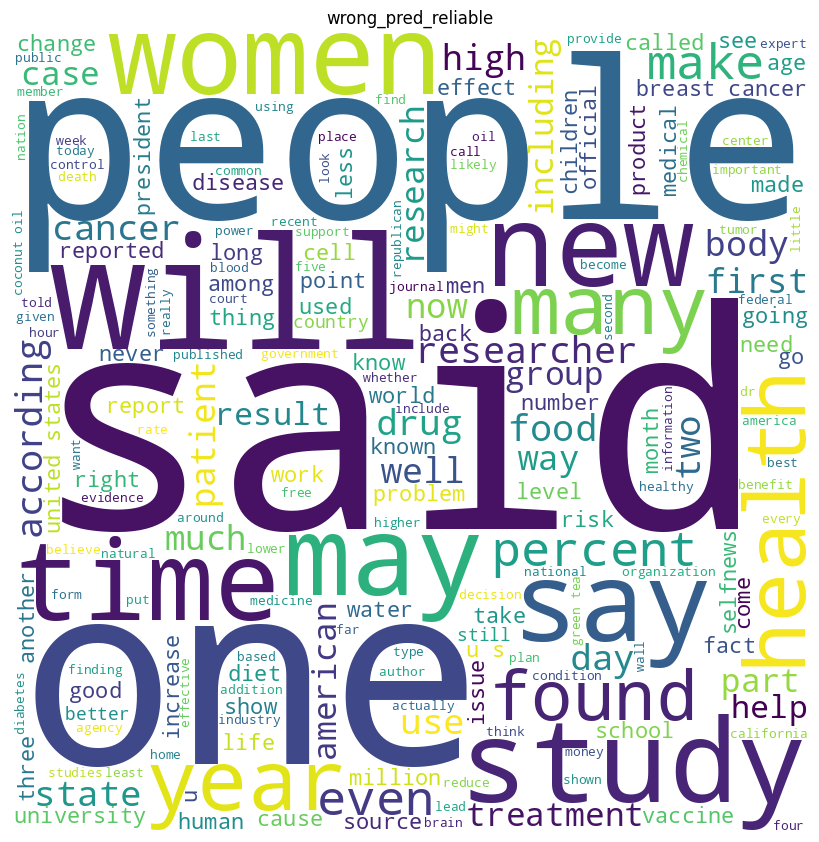

In [16]:
comment_words = ''
stopwords = set(STOPWORDS)
for val in wrong_pred_reliable:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("wrong_pred_reliable")
plt.savefig('images/LSTM_wrong_pred_reliable.png')

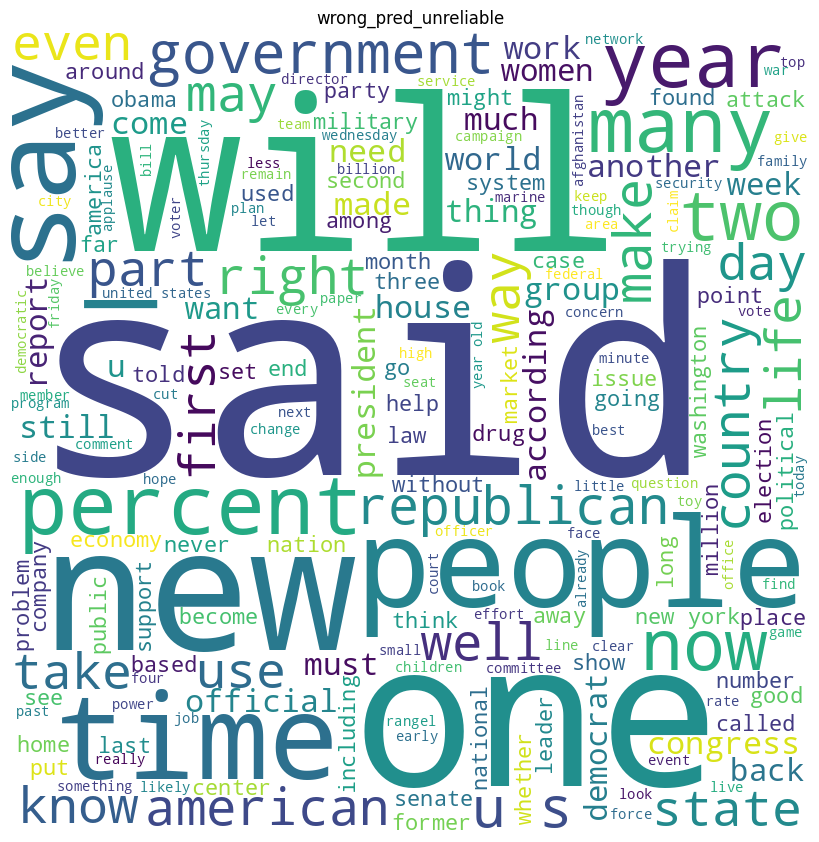

In [17]:
comment_words = ''
stopwords = set(STOPWORDS)
for val in wrong_pred_unreliable:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("wrong_pred_unreliable")
plt.savefig('images/LSTM_wrong_pred_unreliable.png')

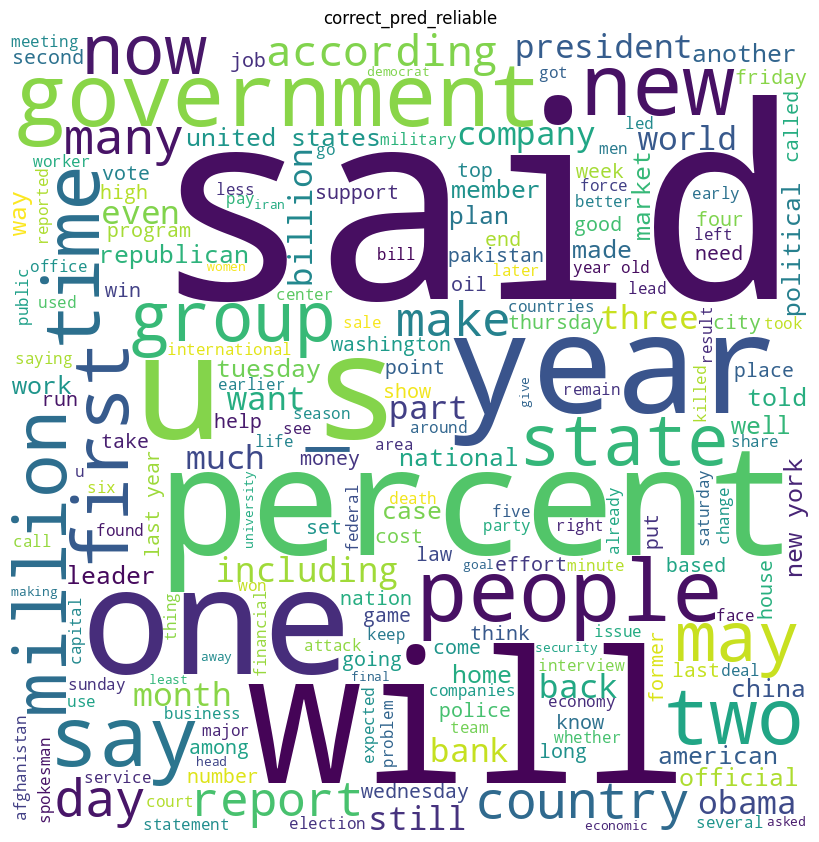

In [18]:
comment_words = ''
stopwords = set(STOPWORDS)
for val in correct_pred_reliable:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("correct_pred_reliable")
plt.savefig('images/LSTM_correct_pred_reliable.png')

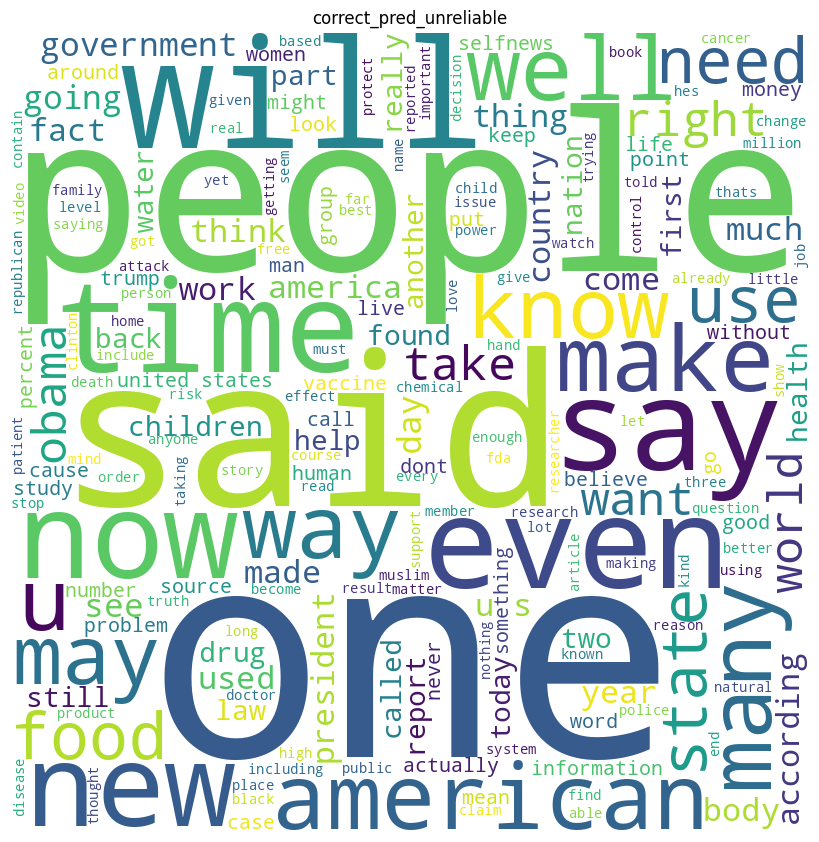

In [19]:

comment_words = ''
stopwords = set(STOPWORDS)
for val in correct_pred_unreliable:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("correct_pred_unreliable")
plt.savefig('images/LSTM_correct_pred_unreliable.png')